In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df.shape

(244, 7)

In [14]:
#dropping th rows with missing values
df.dropna(inplace=True)

In [11]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


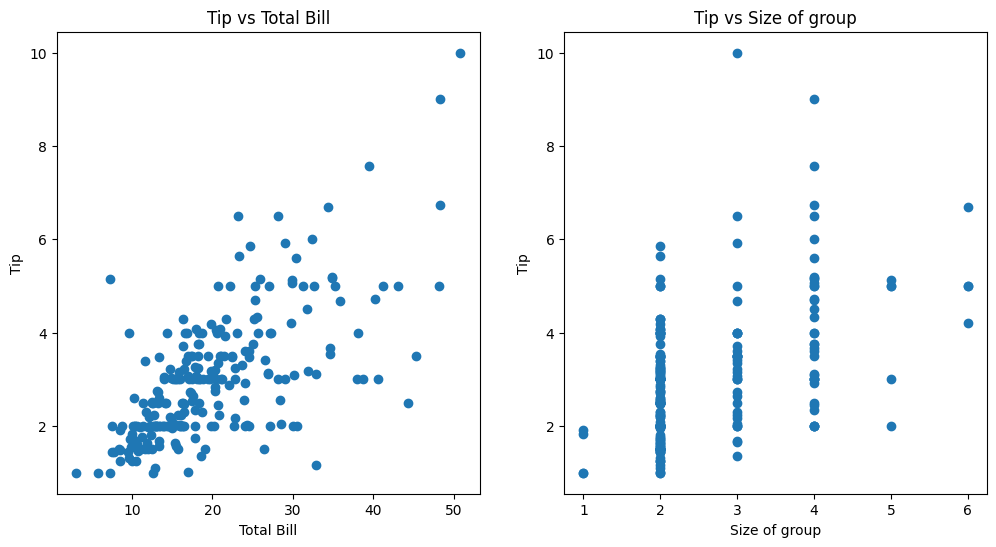

In [38]:
#scatter plot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(df['total_bill'],df['tip'])
plt.title('Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.subplot(1,2,2)
plt.scatter(df['size'],df['tip'])
plt.title('Tip vs Size of group')
plt.xlabel('Size of group')
plt.ylabel('Tip')

plt.show()


In [39]:
#one hot encoding for the categorical variables
data = pd.get_dummies(df, drop_first=True)

In [21]:
data.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


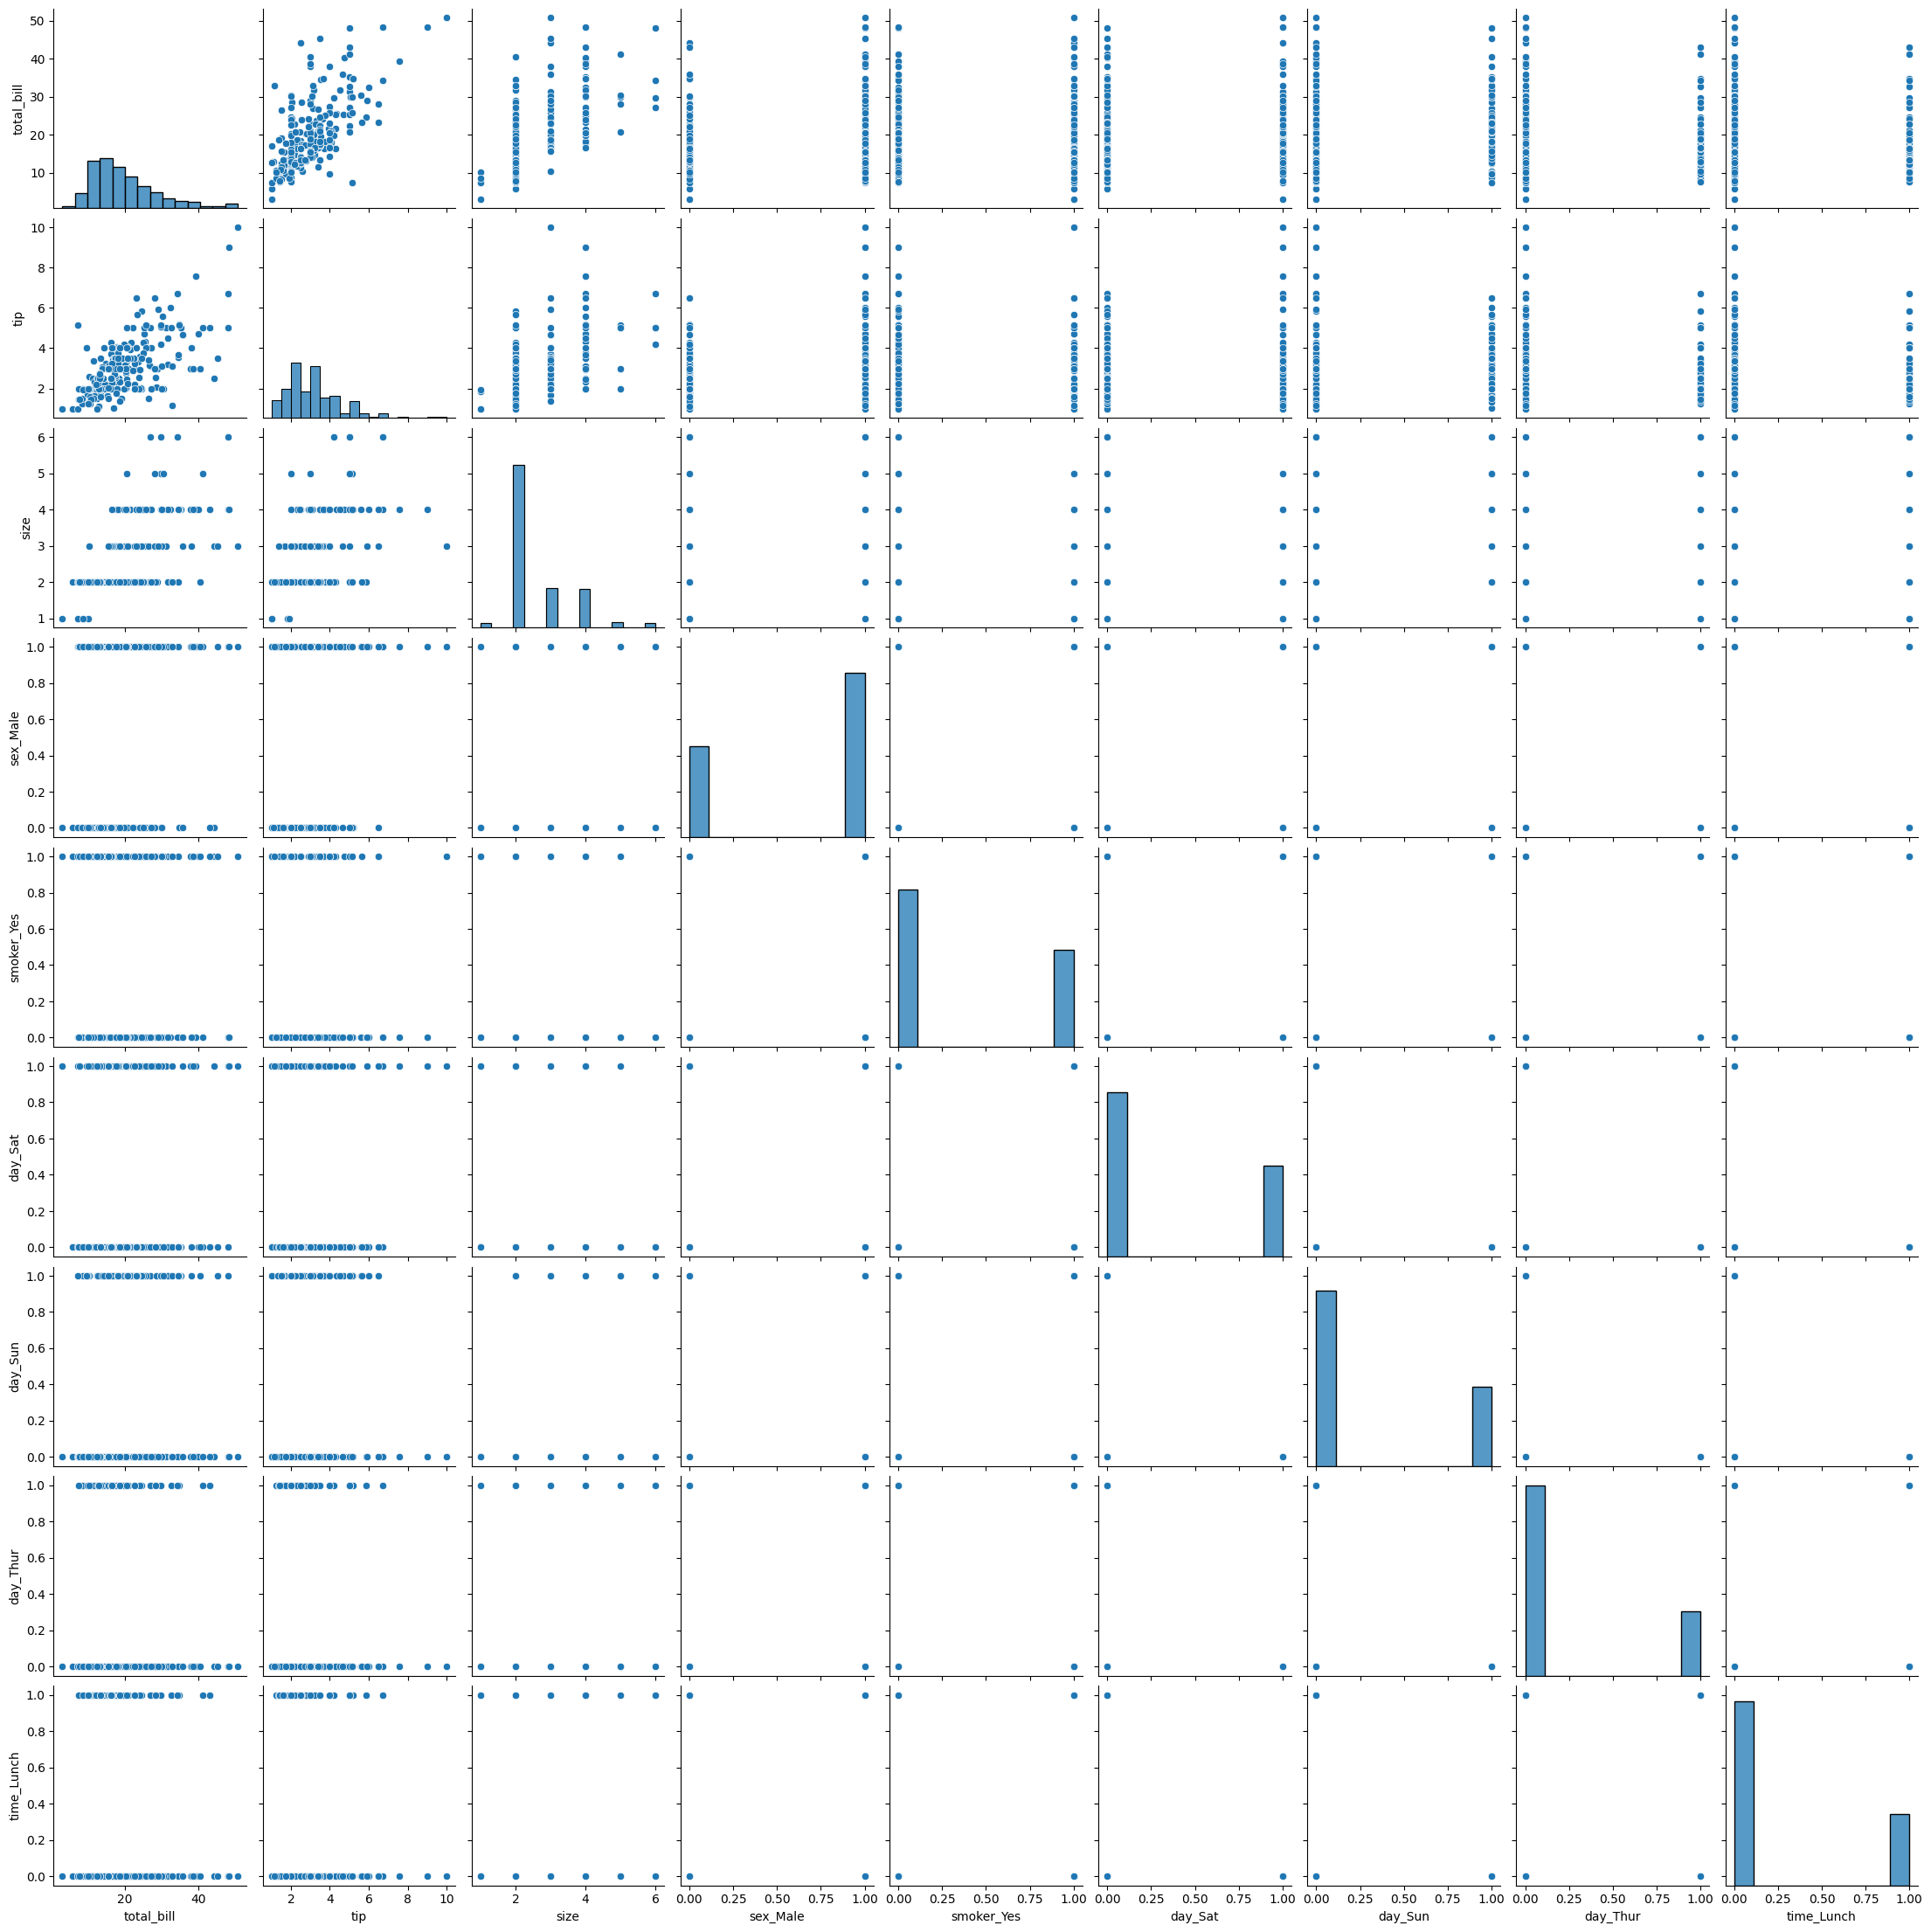

In [22]:
#pairplot for data
sns.pairplot(data)
plt.show()

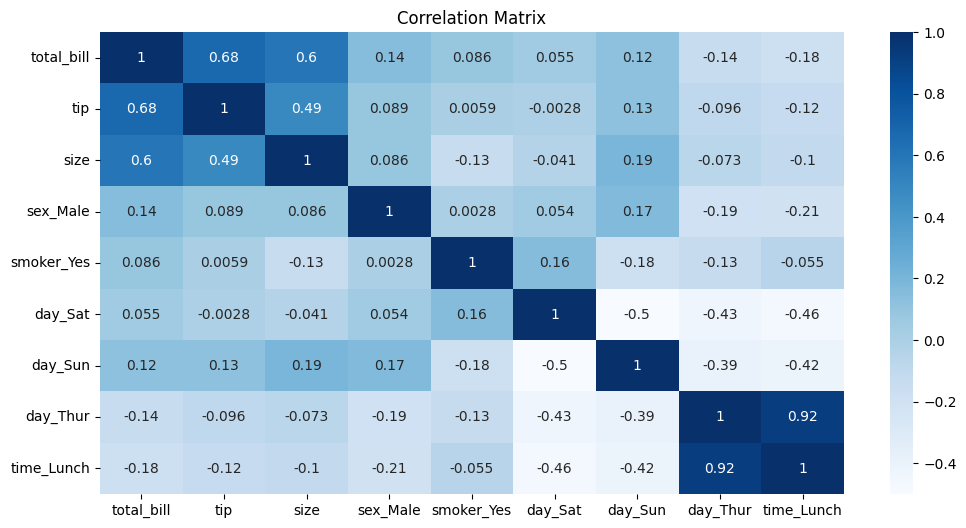

In [43]:
#heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [42]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

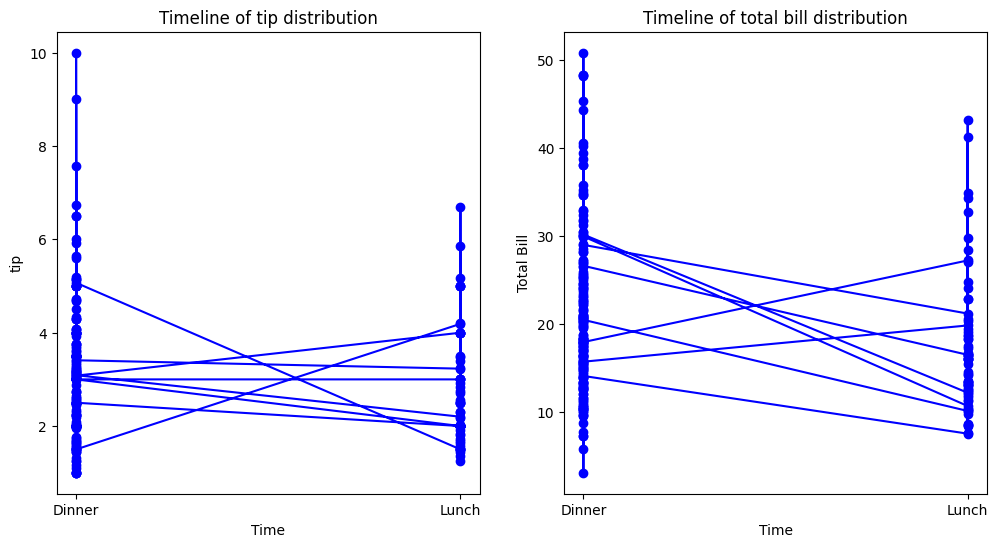

In [45]:
#timeseries
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(df['time'], df['tip'], marker='o', linestyle='-', color='b')
plt.title('Timeline of tip distribution')
plt.xlabel('Time')
plt.ylabel('tip')

plt.subplot(1,2,2)
plt.plot(df['time'], df['total_bill'], marker='o', linestyle='-', color='b')
plt.title('Timeline of total bill distribution')
plt.xlabel('Time')
plt.ylabel('Total Bill')

plt.show()

In [47]:
#rainbow test to check the linearity of the model
X = data.drop('tip', axis=1)
y = data['tip']

# Ensure all data is numeric and convert to float
X = X.astype(float)
y = y.astype(float)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)

print("Rainbow test statistic:", rainbow_stat)
print("Rainbow test p-value:", rainbow_p_value)

if rainbow_p_value < 0.05:
    print("Significant deviation from linearity.")
else:
    print("No significant deviation from linearity.")

Rainbow test statistic: 1.1970545479945884
Rainbow test p-value: 0.16588383059241654
No significant deviation from linearity.


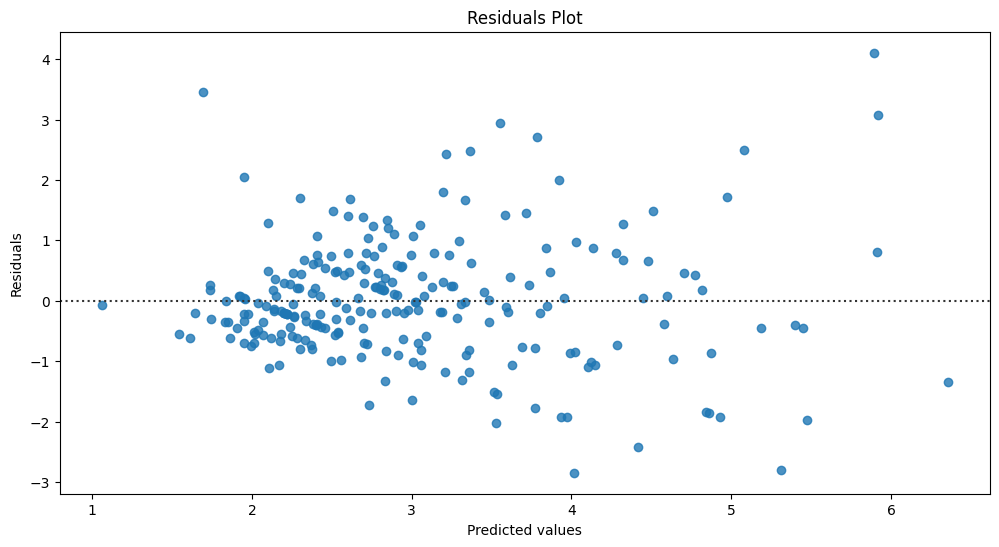

In [49]:
#residual plot to check linearity and randomness
y_pred = model.predict(X)
residuals = y - y_pred
plt.figure(figsize=(12,6))
sns.residplot(x=y_pred, y=residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

The residual plot is randomly distributed along the X-axis. There is no significant pattern or curves, so the linear fit is
correct.

In [50]:
# splitting dataset for fitting models
X = data.drop('tip', axis=1)
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#Linear Regression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred_lr_model=lr_model.predict(X_test)

#Evaluation
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr_model))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr_model))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr_model))

Linear Regression MAE: 0.6671331480264893
Linear Regression MSE: 0.7033566017436106
Linear Regression R2: 0.43730181943482493


The erros are high and R2 score is low, so linear regression doesn't seem to be a good fit for this dataset

In [66]:
#Selecting the best alpha for ridge and lasso regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
lasso = Lasso()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,700]}

ridge_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)

print(f"Best alpha for Ridge: {ridge_search.best_params_['alpha']}")
print(f"Best alpha for Lasso: {lasso_search.best_params_['alpha']}")


Best alpha for Ridge: 700
Best alpha for Lasso: 0.1


In [67]:
# Ridge Regression
ridge = Ridge(alpha=700.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))

Ridge Regression MAE: 0.6291820390384674
Ridge Regression MSE: 0.5764291106075976
Ridge Regression R2: 0.5388461401234814
Lasso Regression MAE: 0.6374841046500828
Lasso Regression MSE: 0.5908528649971524
Lasso Regression R2: 0.5273068720881755


Both Ridge and lasso regression have almost same performance. This is better than linear regression

In [68]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

Decision Tree MAE: 0.8295918367346939
Decision Tree MSE: 1.2551938775510205
Decision Tree R2: -0.004178121600921791


This is a very poor fit. The MAE and MSE are very high and R2 score is negative suggesting poor fit.

In [69]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest MAE: 0.7557163265306125
Random Forest MSE: 0.9196720148979602
Random Forest R2: 0.2642455218065466


Random forest combines 100 decision trees to make predictions which is better than single decision tree as in the previous
code, but still this is not a good performance.

In [70]:
# Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("SVR MAE:", mean_absolute_error(y_test, y_pred_svr))
print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR R2:", r2_score(y_test, y_pred_svr))

SVR MAE: 0.5679864502285389
SVR MSE: 0.5323763062616395
SVR R2: 0.5740891915042663


In [71]:
# KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN MAE:", mean_absolute_error(y_test, y_pred_knn))
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))
print("KNN R2:", r2_score(y_test, y_pred_knn))

KNN MAE: 0.718857142857143
KNN MSE: 0.8763725714285714
KNN R2: 0.29888587066985495


After checking all the regressions, we conclude that the SVR is the best fit. We can also use ridge and lasso. decision tree and 
random forests are the worst fit.

**Insights for Management**

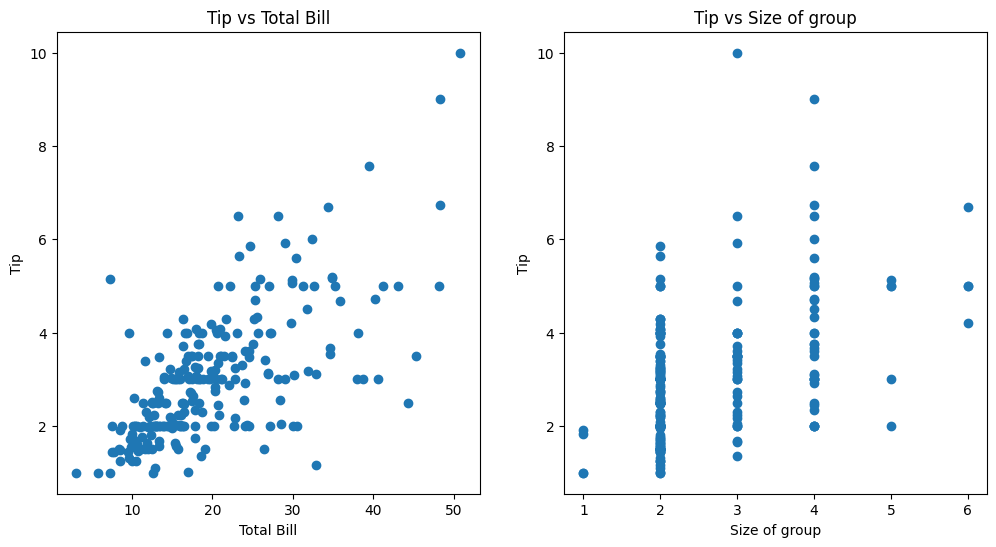

In [72]:
#analysing bill and tip and group size and tip
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(df['total_bill'],df['tip'])
plt.title('Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.subplot(1,2,2)
plt.scatter(df['size'],df['tip'])
plt.title('Tip vs Size of group')
plt.xlabel('Size of group')
plt.ylabel('Tip')

plt.show()

The most frequent tip amount is between 2 to 4. The higher tip amount is given for bill amount more than 25.
The highest tip is given by group consisting of 4 persons. The amount is almost same for 3 and 2 size. A single person gives
least tip.

In [74]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

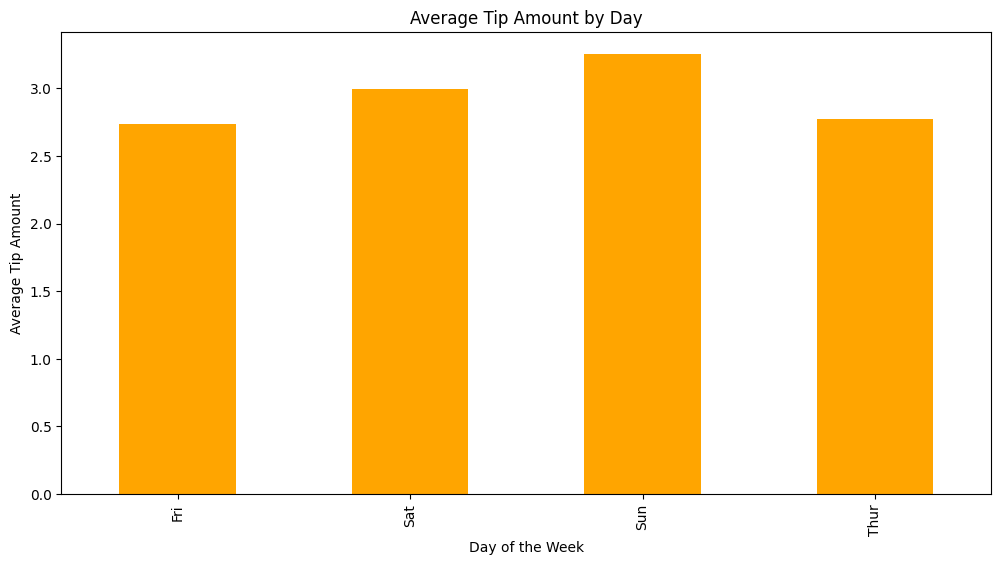

In [78]:
#Tip analysis according to days.
#calculating average tip per day
avg_tip_per_day = df.groupby('day')['tip'].mean().sort_index()

# Bar plot for average tip amount per day
plt.figure(figsize=(12, 6))
avg_tip_per_day.plot(kind='bar', color='orange')
plt.title('Average Tip Amount by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Amount')
plt.show()

The  maximum tip is given on Sundays and than Saturdays. On weekdays, tip amount is almost the same.

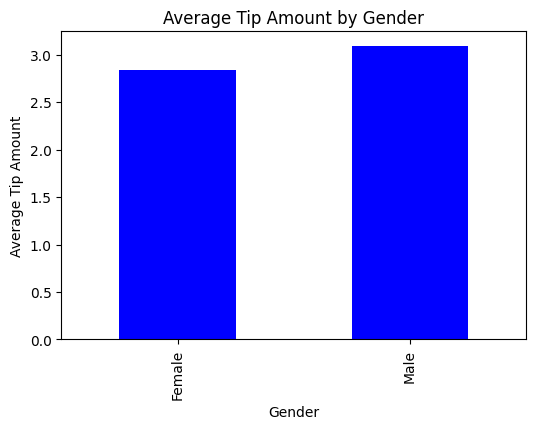

In [79]:
#tip analysis according to gender
# Average tip by gender
avg_tip_by_gender = df.groupby('sex')['tip'].mean()

# Bar plot for average tip amount by gender
plt.figure(figsize=(6, 4))
avg_tip_by_gender.plot(kind='bar', color='blue')
plt.title('Average Tip Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Tip Amount')
plt.show()

Tip given by male is more than female.

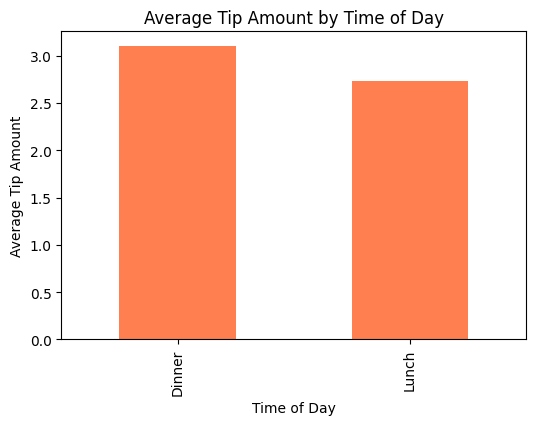

In [80]:
# Calculate average tip amount by time of day (lunch vs. dinner)
avg_tip_by_time = df.groupby('time')['tip'].mean()

# Bar plot for average tip amount by time of day
plt.figure(figsize=(6, 4))
avg_tip_by_time.plot(kind='bar', color='coral')
plt.title('Average Tip Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Tip Amount')
plt.show()

The tip given at the dinner time is more than at lunch.

**Conclusion**
<br>
The tip amount is higher for bills more than 25 so straties to sell more products in this range is beneficial. Group bookings of 
3-4 peoples should be arranged. Special offers can be kept on weekends as more tips are recieved on weekends. Male customers provide more tip so we can have some straties to increase their participation. Enhancing dinner time facilities could give the tip amount a boost as more tips are provided at dinner time.
